In [23]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
import os
import cv2

In [45]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [100]:
test_set_path = r"C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\Data\Test_set"
model_path = r'C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\model\lego.keras'
folder_path = r'C:\Users\bruno\OneDrive\Documenti\Deep_learning_project\img'


In [101]:
image_size = (400, 400)
batch_size = 32

In [102]:
 
datagen_2 = ImageDataGenerator(rescale=1./255)   

In [103]:
test_set = datagen_2.flow_from_directory(
        directory=test_set_path,
        class_mode='categorical',
        color_mode="grayscale",
        target_size=image_size,
        batch_size=batch_size,
        shuffle=False,
        seed=42,
        interpolation="bilinear"
    )
    

Found 4000 images belonging to 50 classes.


In [104]:
model = load_model(model_path)

In [105]:

y_hat_pre = model.predict(test_set)
y_hat = np.argmax(y_hat_pre, axis=1)

y_true = test_set.classes

loss, accuracy = model.evaluate(test_set)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 10s 77ms/step - loss: 0.6494 - accuracy: 0.7837
Loss: 0.6493719220161438
Accuracy: 0.7837499976158142


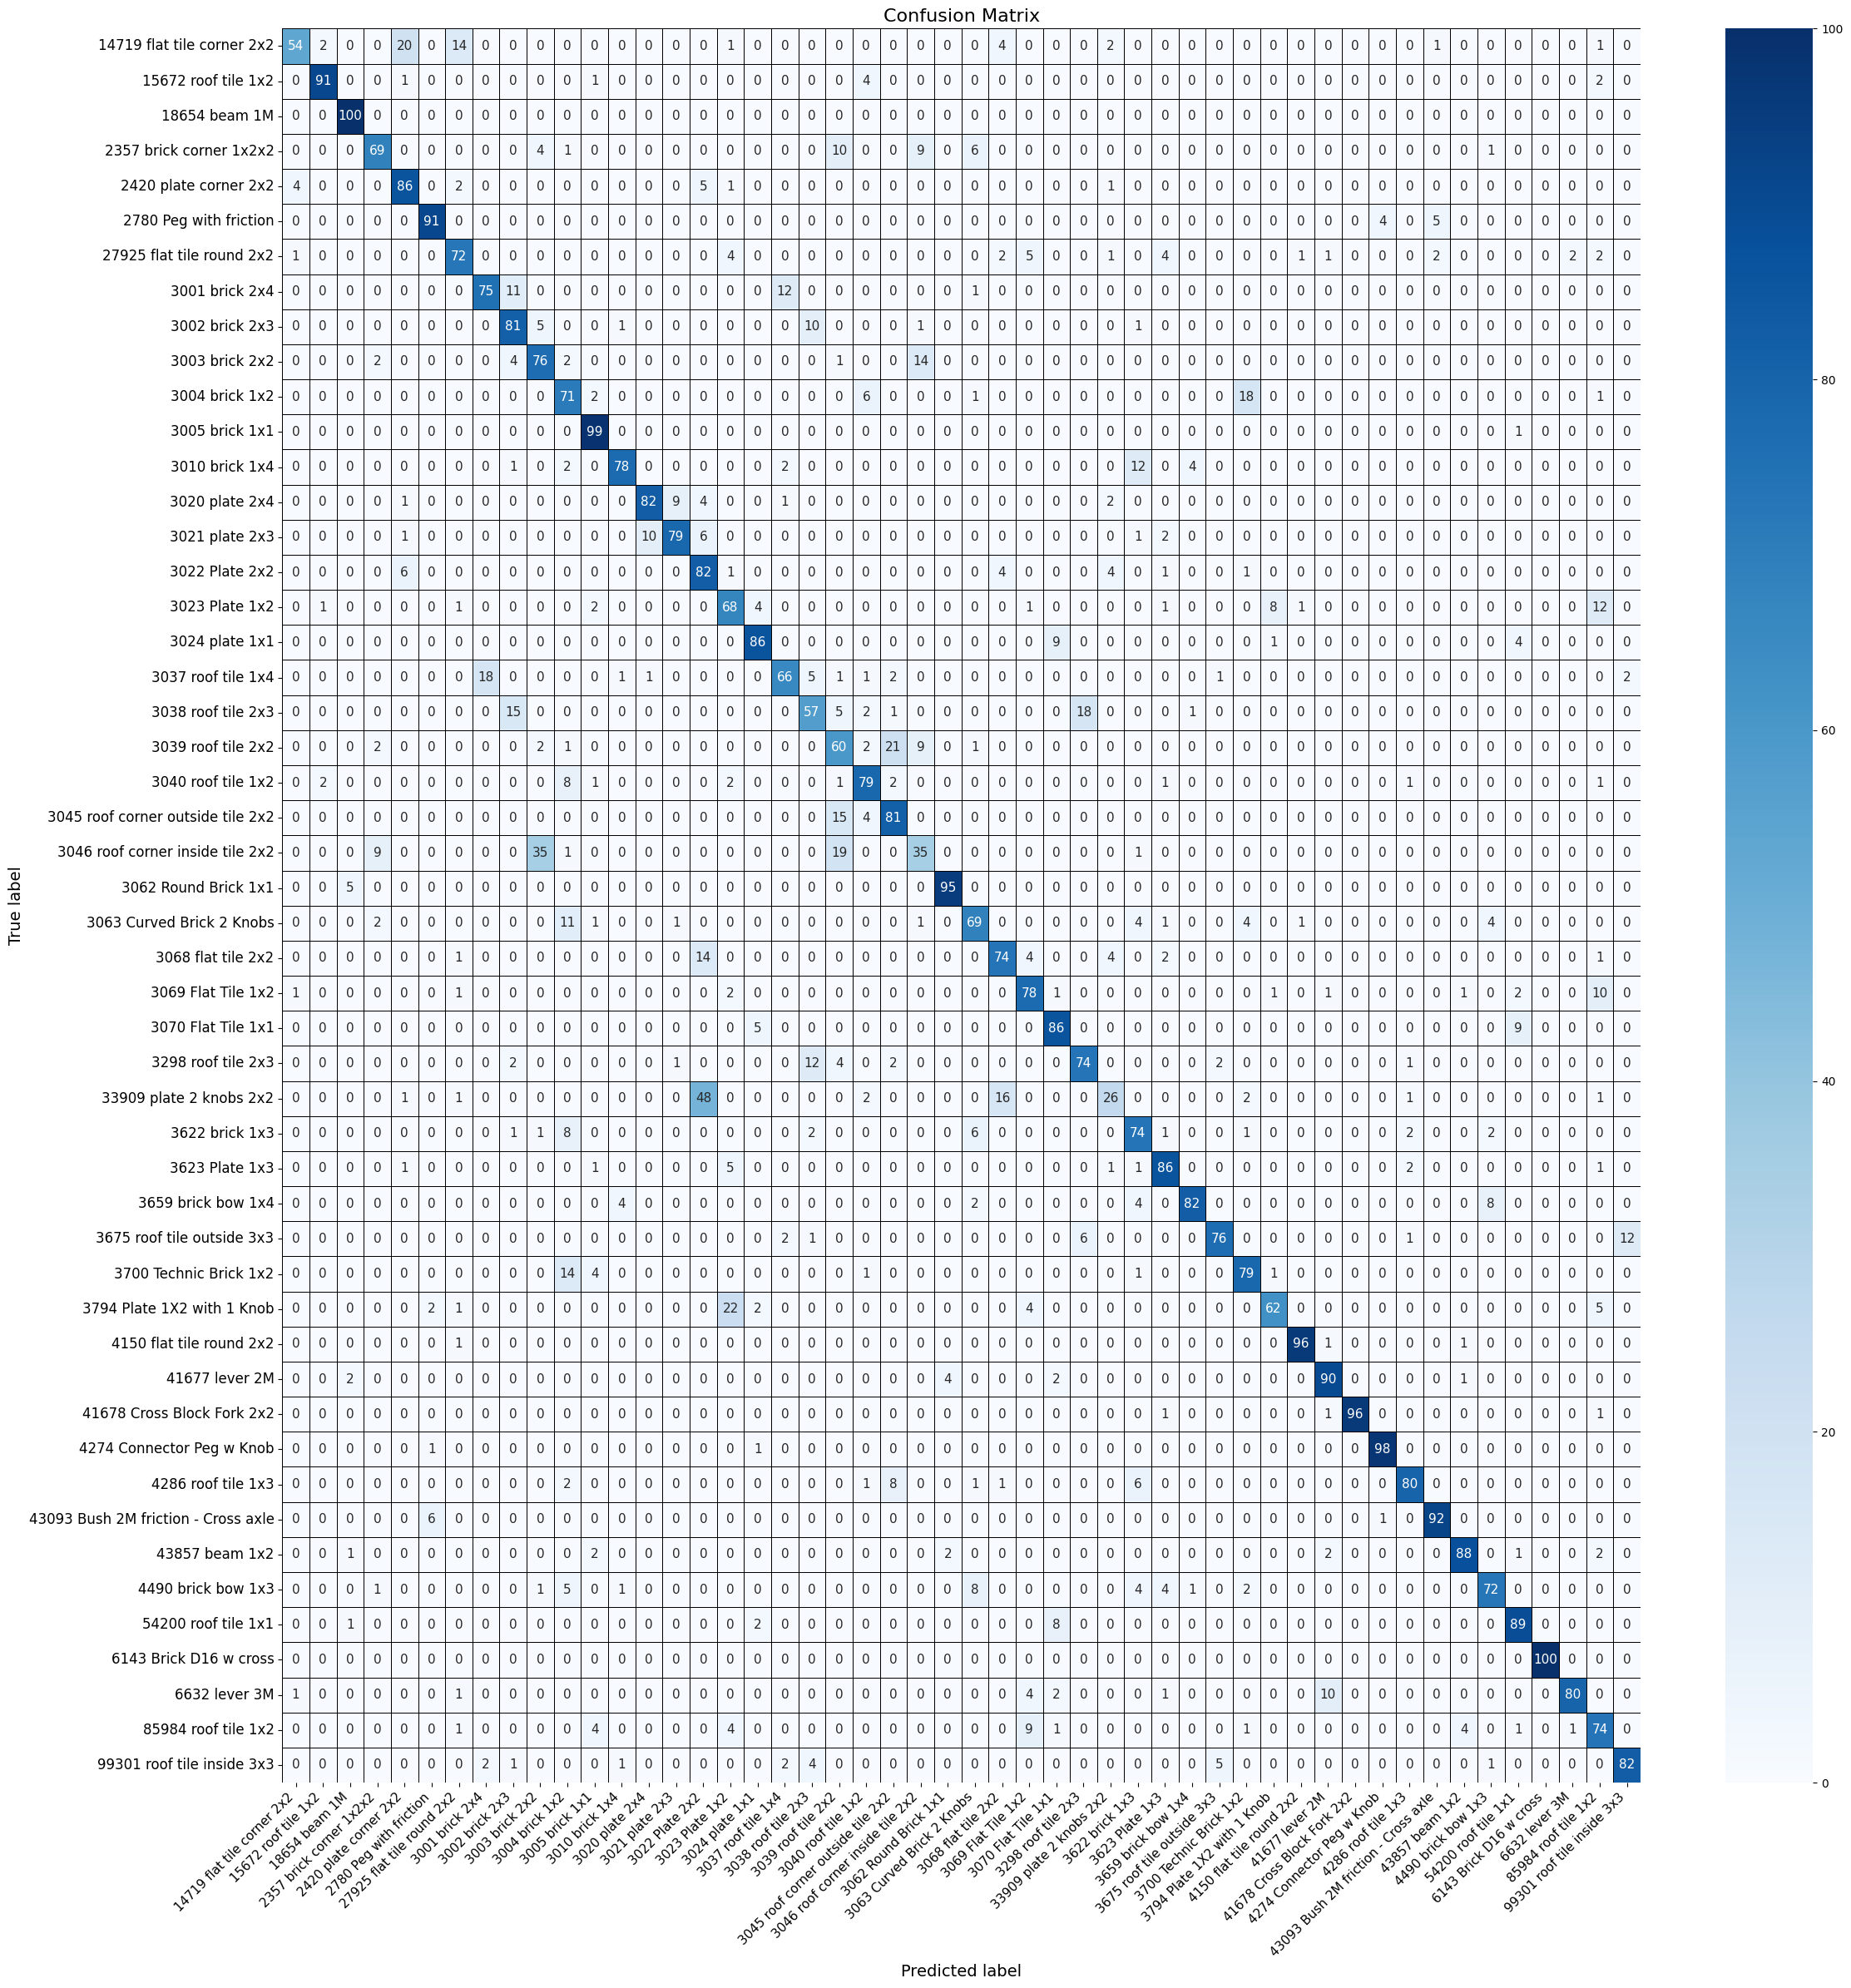

In [106]:
# Calcola la matrice di confusione
cm = confusion_matrix(y_true, y_hat)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_percent = cm_normalized * 100

class_labels = list((test_set.class_indices.keys()))

# Crea la heatmap
plt.figure(figsize=(24, 24))
ax = sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                fmt='.0f', annot_kws={"size": 11}, linewidths=0.5, linecolor='black')

# Impostazioni per migliorare la leggibilità delle etichette sull'asse x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [107]:
 
datagen_shuffle= ImageDataGenerator(rescale=1./255)   

In [108]:
test_set_shuffle = datagen_shuffle.flow_from_directory(
        directory=test_set_path,
        class_mode='categorical',
        color_mode="grayscale",
        target_size=image_size,
        batch_size=batch_size,
        shuffle=True,
        seed=42,
        interpolation="bilinear"
    )
    

Found 4000 images belonging to 50 classes.


In [109]:
loss, accuracy = model.evaluate(test_set_shuffle)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 10s 78ms/step - loss: 0.6494 - accuracy: 0.7837
Loss: 0.6493722200393677
Accuracy: 0.7837499976158142


In [110]:
class_labels_shuffle = list((test_set_shuffle.class_indices.keys())) # labels shuffle true

In [111]:
images, labels_sample = next(test_set_shuffle)

In [112]:
y_hat_shuffle = np.argmax(model.predict(images), axis=1)

1/1 [==============================] - 0s 118ms/step


In [113]:
def converti_one_hot_in_classe(one_hot_label, class_names):
    indice_classe = np.argmax(one_hot_label) 
    return class_names[indice_classe]

In [114]:
y_true_one_hot = [converti_one_hot_in_classe(lable,class_labels_shuffle) for lable in labels_sample]

In [115]:
print(y_true_one_hot)

['3040 roof tile 1x2', '3040 roof tile 1x2', '85984 roof tile 1x2', '3623 Plate 1x3', '3039 roof tile 2x2', '6632 lever 3M', '43093 Bush 2M friction - Cross axle', '3068 flat tile 2x2', '6632 lever 3M', '18654 beam 1M', '2780 Peg with friction', '99301 roof tile inside 3x3', '54200 roof tile 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3659 brick bow 1x4', '3069 Flat Tile 1x2', '41678 Cross Block Fork 2x2', '3069 Flat Tile 1x2', '2357 brick corner 1x2x2', '3037 roof tile 1x4', '3045 roof corner outside tile 2x2', '3038 roof tile 2x3', '3675 roof tile outside 3x3', '3063 Curved Brick 2 Knobs', '2420 plate corner 2x2', '3622 brick 1x3', '3038 roof tile 2x3', '3010 brick 1x4', '3023 Plate 1x2', '2357 brick corner 1x2x2', '14719 flat tile corner 2x2']


In [116]:
num_images = min(len(images), 20)

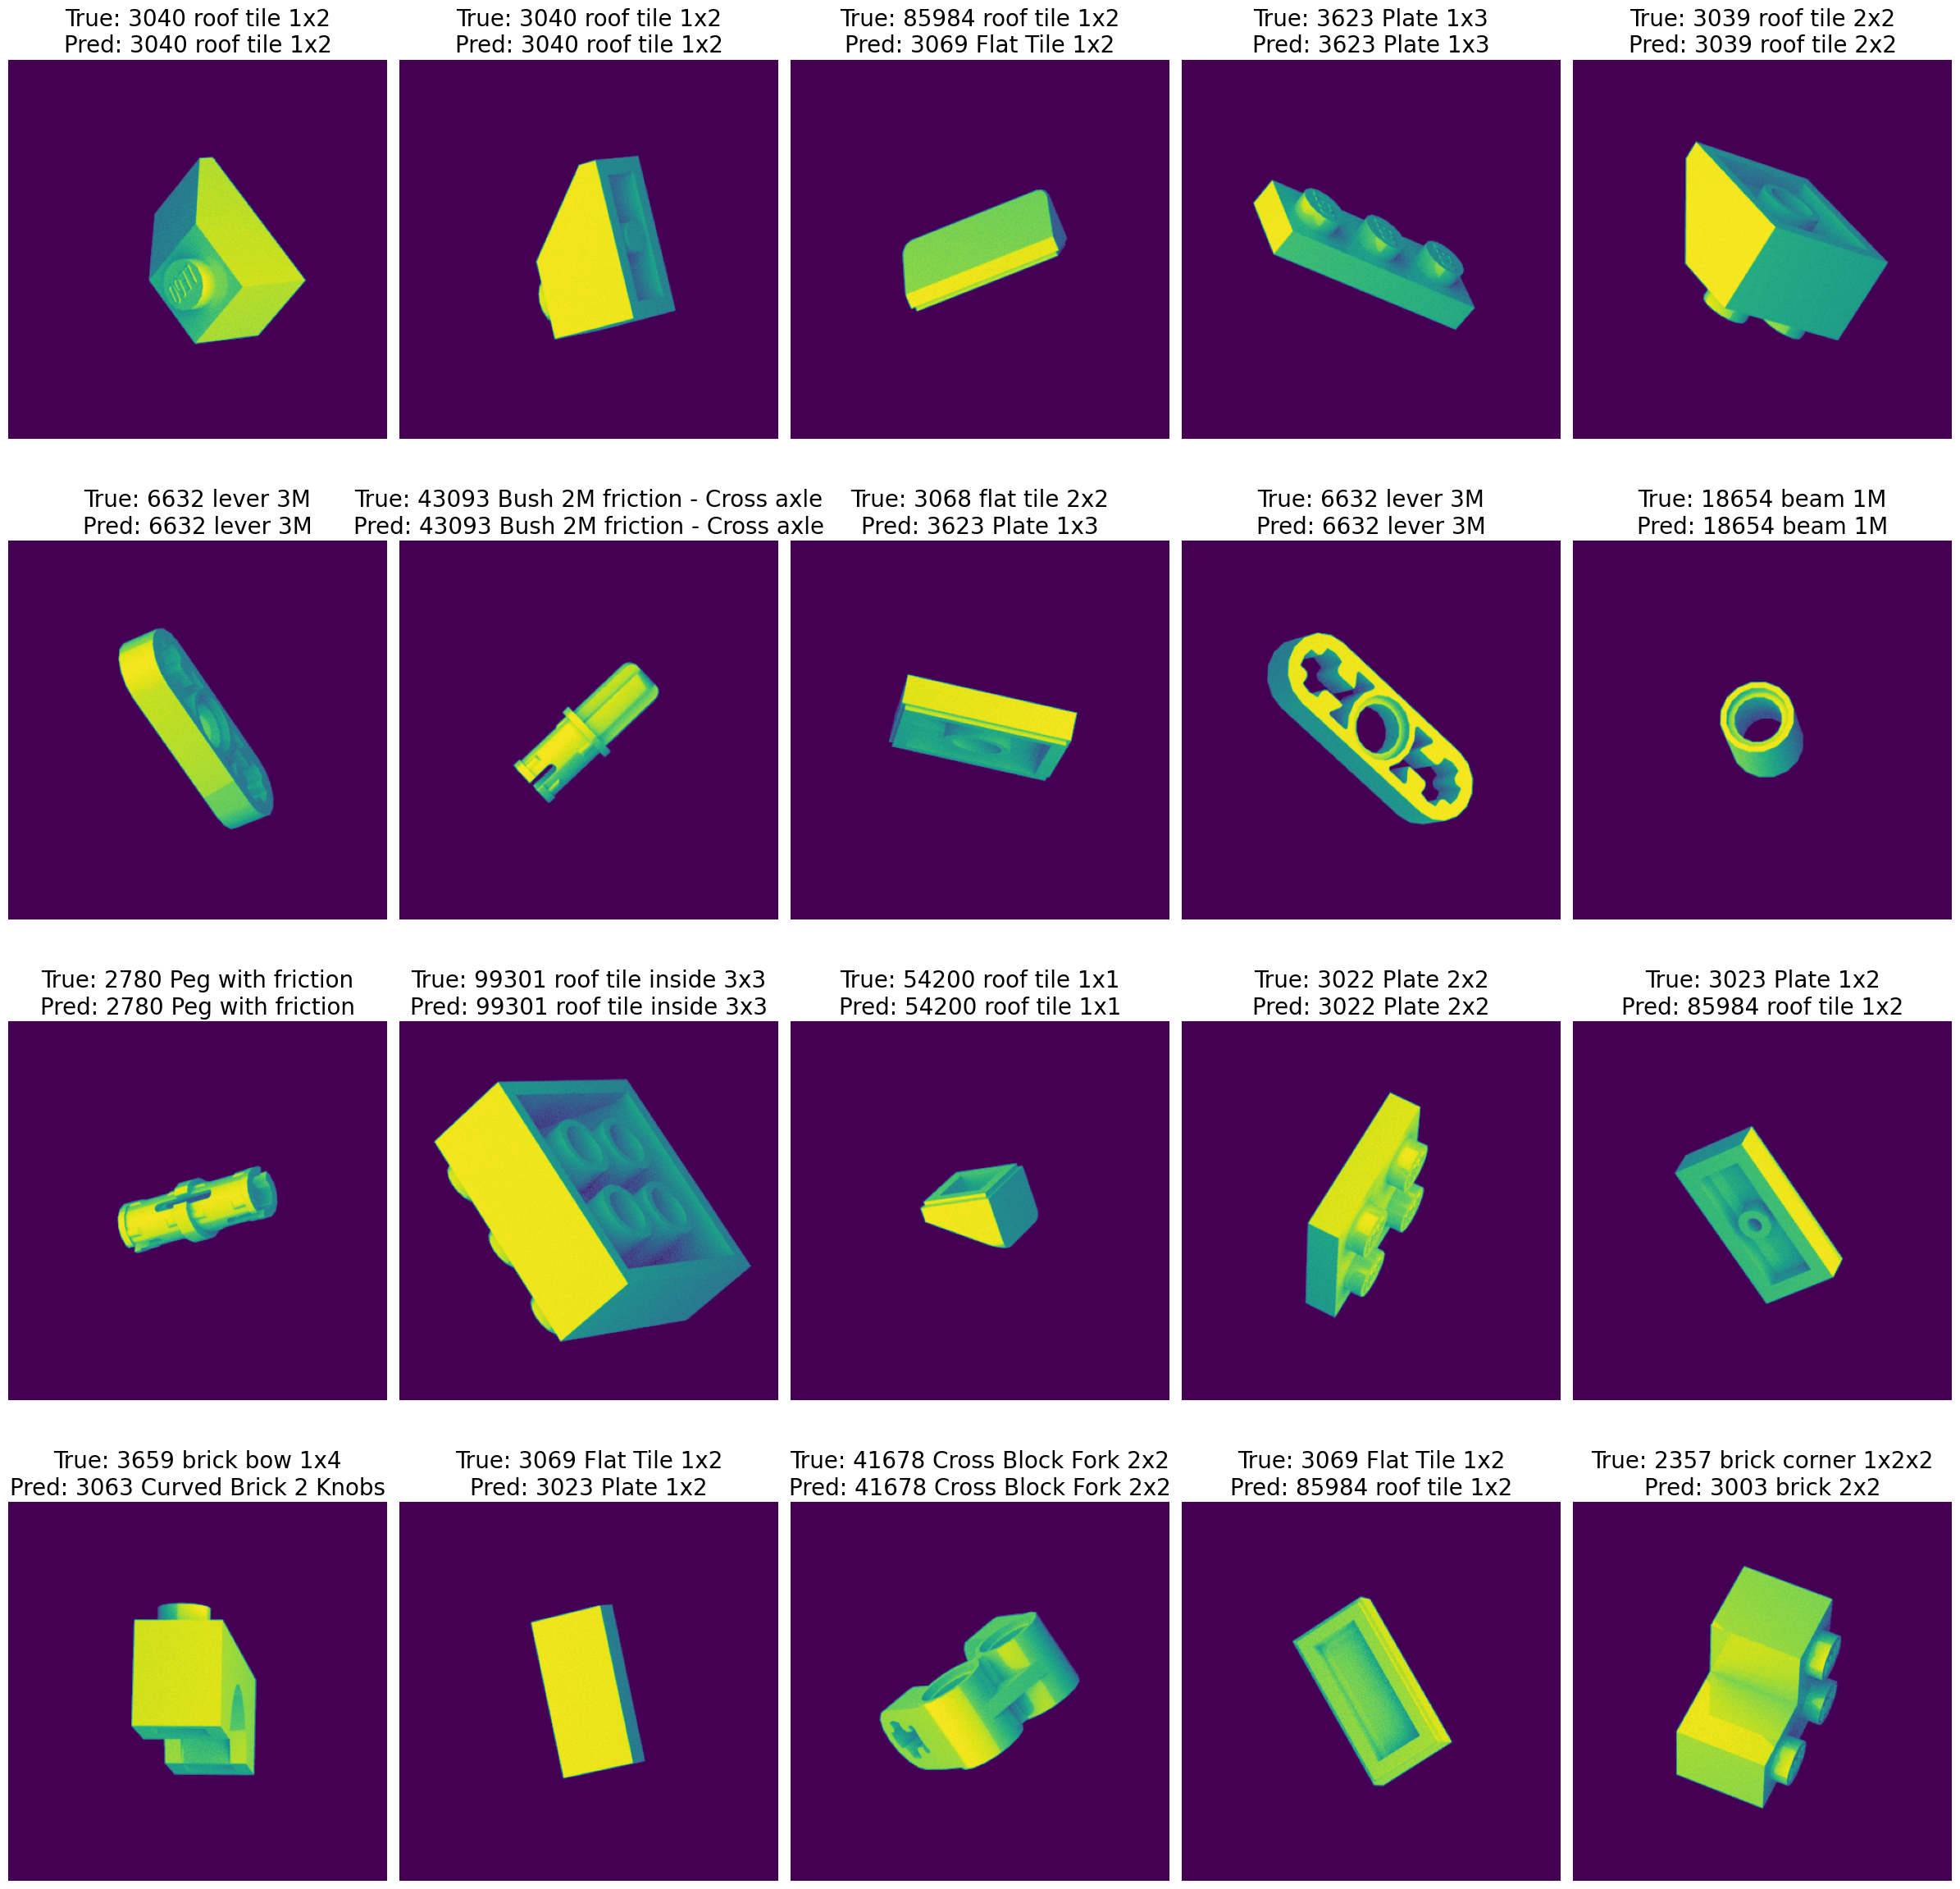

In [117]:

def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        true_label = true_labels[i]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}',fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(images, y_true_one_hot, y_hat_shuffle, class_labels_shuffle, num_images)